## Customer Churn Prediction
This study focuses on a dataset created to predict customer churn probability.

The dataset includes details about customers such as estimated salary, age, gender and more. The primary aim is to provide comprehensive information about the likelihood of a customer churn.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report

In [2]:
customer_data = pd.read_csv('Churn_Modelling.csv')

In [3]:
customer_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


About data columns:

RowNumber: The number of the row

CustomerId: The unique customer id

Surname: Customers Surname

CreditScore: Their credit score

Geography: Which Country they belong to

Gender: Their Gender

Age: Age

Tenure: The time of bond with company

Balance: The amount left with them

NumofProducts: The products they own.

HasCrCard: Do they have a credit card or not

IsActiveMember: How active member they are

EstimatedSalary: Their estimated salary

Exited: Whether they stay in the or leave

### Data Exploration (EDA - Exploratory Data Analysis) 
Examine the structure of the dataset (columns, data types, missing values).
Explore basic statistics (mean, median, standard deviation, etc.).
Gain more insights about the data by creating data visualizations.

In [4]:
customer_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#getting list of columns
columns= customer_data.columns.values.tolist()
columns

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [7]:
customer_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
#no null values

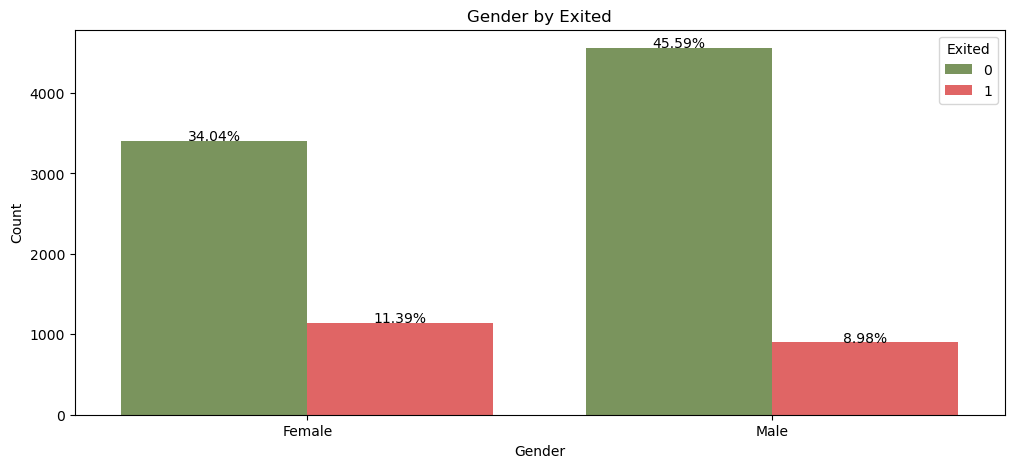

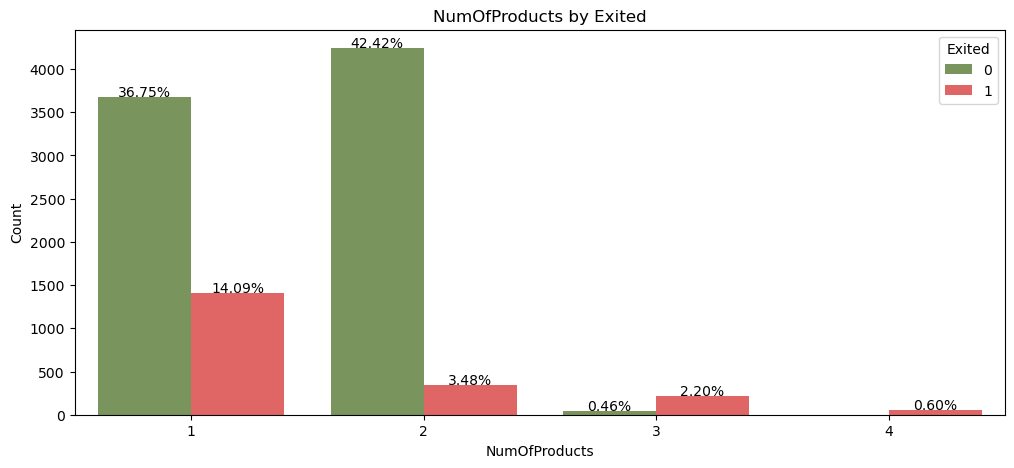

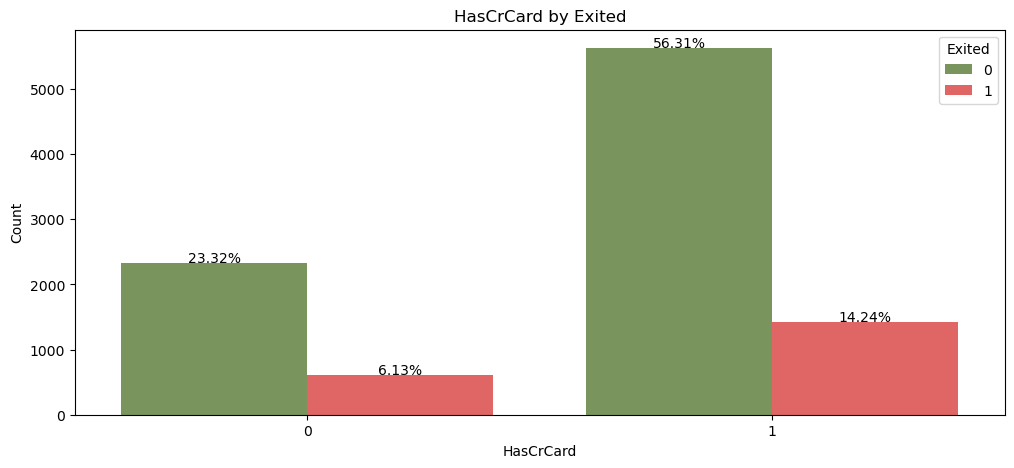

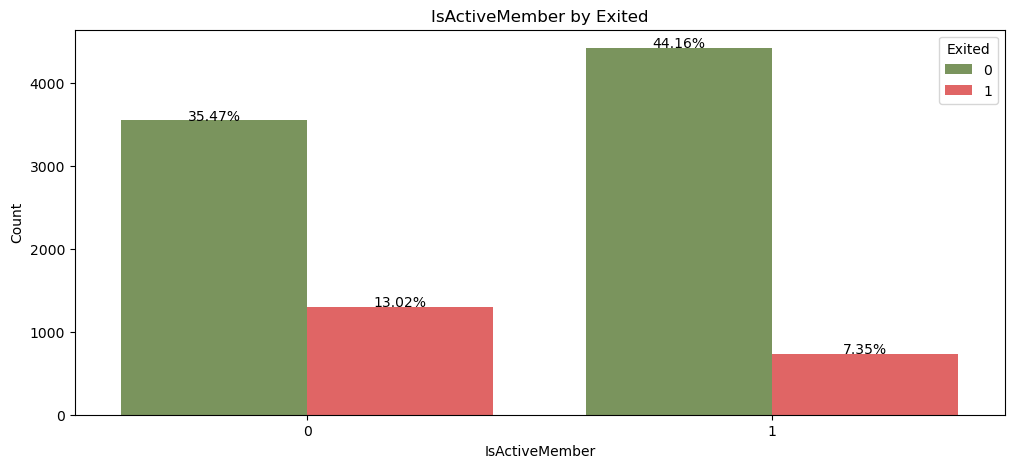

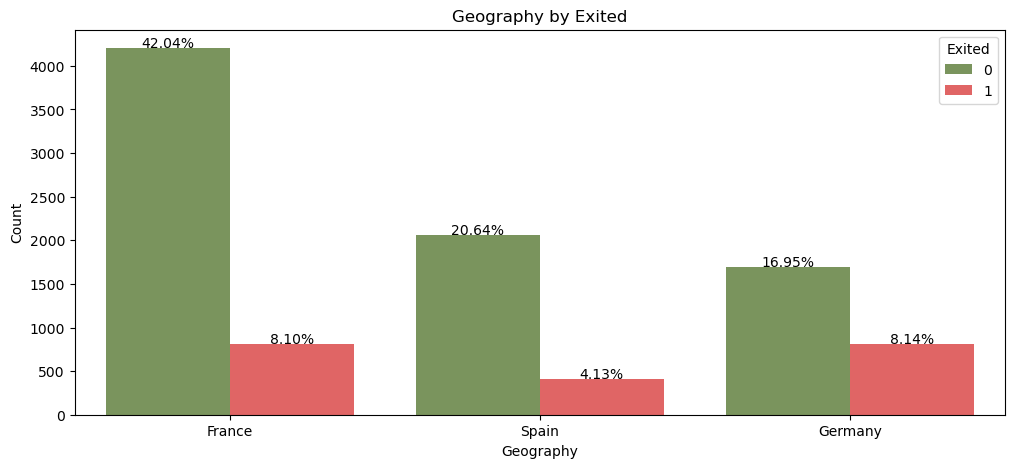

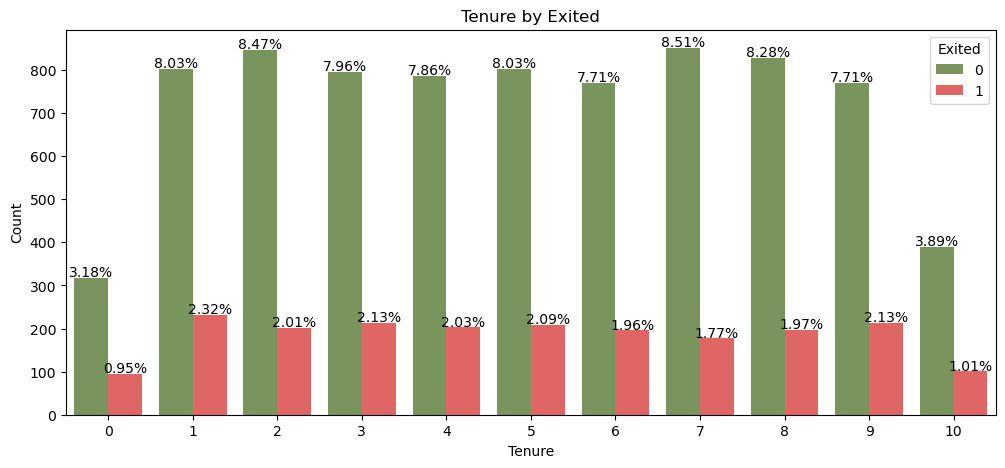

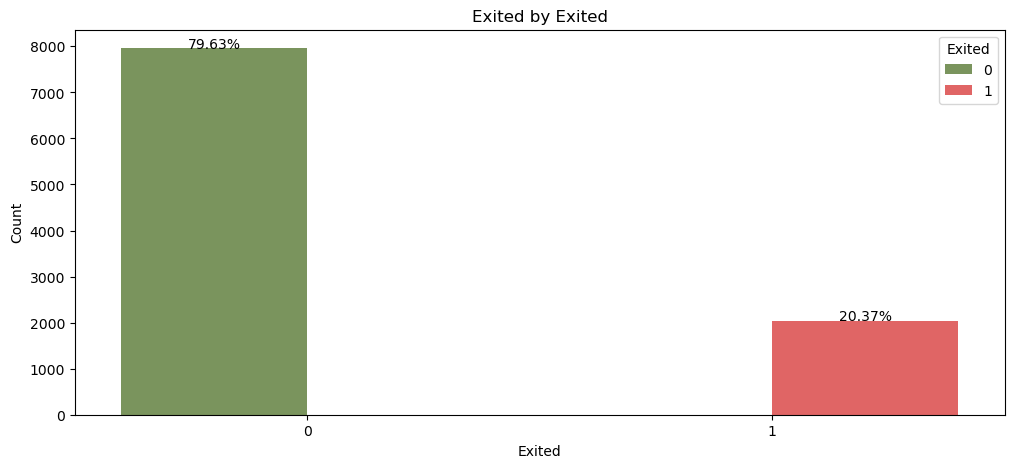

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_data = customer_data[["Gender","NumOfProducts","HasCrCard","IsActiveMember","Geography","Tenure","Exited"]]
palette_features = ['#7A9D54', '#F55050']

def count_plot(customer_data,hue):
    columns = customer_data.columns
    for column in columns:
        plt.figure(figsize=(12, 5))
        ax = sns.countplot(x=column, hue=hue, data=customer_data,palette=palette_features)
        plt.title(f'{column} by {hue}')
        plt.xlabel(column)
        plt.ylabel("Count")

        total = len(customer_data)
        for p in ax.patches:
            height = p.get_height()
            percent = 100 * height / total
            if percent > 0:
                ax.text(p.get_x() + p.get_width() / 2., height + 3,
                        f'{percent:.2f}%', ha="center")

        plt.show()
        
count_plot(plot_data,"Exited")

It is observed that the majority of churned users are female, while the majority of active customers are male.

It is evident that active users tend to have a maximum of 3 products, with the majority having 2 products.

An observation indicates that a significant portion of both active and churned users hold credit cards.

The majority of active customers are from France, while the majority of churned customers are from Germany.

The data indicates that 80% of it pertains to active users, while the remaining 20% is associated with churned users

<Axes: xlabel='Exited', ylabel='count'>

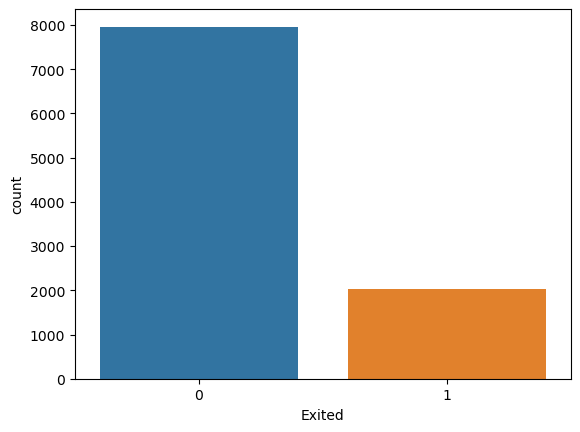

In [11]:
sns.countplot(data=customer_data,x='Exited')

###### - We see its an imbalanced dataset

### Data Preprocessing 

- Converting categorical variables to numerical data (One-Hot Encoding).

- Removing Unnecessary Columns

- Splitting the data into train and test sets.

In [12]:
#Removing ID or unsignificant columns-
dataset=customer_data.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [13]:
#Converting categorical columns to numeric columns-
dataset = dataset.drop(['Geography','Gender'],axis=1)

In [14]:
Geography= pd.get_dummies(customer_data.Geography).iloc[:,1:]
Gender=pd.get_dummies(customer_data.Gender).iloc[:,1:]

In [15]:
dataset = pd.concat([dataset,Geography,Gender],axis=1)

In [16]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [17]:
#Creating Target variable-
X=dataset.drop(['Exited'],axis=1)
y=dataset['Exited']

In [18]:
X = X.astype('float64')


In [19]:
#high correlation variable can be excluded-
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()




In [20]:
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable']= X.columns

In [21]:
vif

,VIF,variable
0,21.236445,CreditScore
1,12.334128,Age
2,3.872755,Tenure
3,3.182267,Balance
4,7.826417,NumOfProducts
5,3.289605,HasCrCard
6,2.075966,IsActiveMember
7,3.887186,EstimatedSalary
8,1.787170,Germany
9,1.486247,Spain


In [22]:
#data split into train-test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

#### Machine Learning 
Modelling (Logistic Regression, Decision Tree, Random Forest, XGBoost).
Train the model and fine-tune hyperparameters.
Evaluate the model's performance on the training data.

##### Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

y_predict_dtc = dtc.predict(X_test)

dtc_accuracy_1 = accuracy_score(y_test,y_predict_dtc)
dtc_report_1 = classification_report(y_test, y_predict_dtc)

print("Decision Tree Classifier Accuracy: \n\n {} \n\nDecision Tree Classifier Report: \n\n {} ".format(dtc_accuracy_1,dtc_report_1))

Decision Tree Classifier Accuracy: 

 0.795 

Decision Tree Classifier Report: 

               precision    recall  f1-score   support

           0       0.89      0.85      0.87      1595
           1       0.49      0.57      0.53       405

    accuracy                           0.80      2000
   macro avg       0.69      0.71      0.70      2000
weighted avg       0.81      0.80      0.80      2000
 


###### Decision Tree Classifier with Fine-tuning

In [28]:
from sklearn.model_selection import GridSearchCV

dtc_model = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'splitter': ['best', 'random']
}

grid_search = GridSearchCV(estimator=dtc_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_dtc_model = grid_search.best_estimator_

best_dtc_model.fit(X_train, y_train)

y_predict_dtc = best_dtc_model.predict(X_test)

dtc_accuracy = accuracy_score(y_test, y_predict_dtc)
dtc_report = classification_report(y_test, y_predict_dtc)

print("Best Decision Tree Parameters: \n\n", best_params)
print("Decision Tree Classifier Accuracy: \n\n", dtc_accuracy)
print("Decision Tree Classifier Report: \n\n", dtc_report)

Best Decision Tree Parameters: 

 {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
Decision Tree Classifier Accuracy: 

 0.8605
Decision Tree Classifier Report: 

               precision    recall  f1-score   support

           0       0.89      0.94      0.91      1595
           1       0.70      0.55      0.62       405

    accuracy                           0.86      2000
   macro avg       0.79      0.75      0.77      2000
weighted avg       0.85      0.86      0.85      2000



##### XG BOOST- 

In [29]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3)
xgb_model.fit(X_train, y_train)

y_predict_xgb = xgb_model.predict(X_test)

xgb_accuracy_1 = accuracy_score(y_test, y_predict_xgb)
xgb_report_1 = classification_report(y_test, y_predict_xgb)

print("XGBoost Accuracy: \n\n {} \n\nXGBoost Report: \n\n {} ".format(xgb_accuracy_1,xgb_report_1))

XGBoost Accuracy: 

 0.8675 

XGBoost Report: 

               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.76      0.51      0.61       405

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000
 


In [32]:

from sklearn.metrics import classification_report,accuracy_score

print(classification_report(y_test,y_predict_xgb))
print(accuracy_score(y_test,y_predict_xgb))




              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.76      0.51      0.61       405

    accuracy                           0.87      2000
   macro avg       0.82      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

0.8675


###### XGBoost with Fine-tuning 

In [33]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

best_xgb_model.fit(X_train, y_train)

y_predict_xgb = best_xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, y_predict_xgb)
xgb_report = classification_report(y_test, y_predict_xgb)

print("Best XGBoost Parameters: \n\n", best_params)
print("XGBoost Accuracy: \n\n", xgb_accuracy)
print("XGBoost Report: \n\n", xgb_report)

Best XGBoost Parameters: 

 {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
XGBoost Accuracy: 

 0.864
XGBoost Report: 

               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.73      0.52      0.61       405

    accuracy                           0.86      2000
   macro avg       0.81      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



####  Model Evaluation 
- Examine the ROC curve and AUC value.
- Compare different models.

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [35]:
# Decision Tree Classifier ROC
dtc_probabilities = best_dtc_model.predict_proba(X_test)[:, 1]
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_probabilities)
dtc_auc = roc_auc_score(y_test, dtc_probabilities)

In [36]:
# XGBoost ROC
xgb_probabilities = best_xgb_model.predict_proba(X_test)[:, 1]
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probabilities)
xgb_auc = roc_auc_score(y_test, xgb_probabilities)

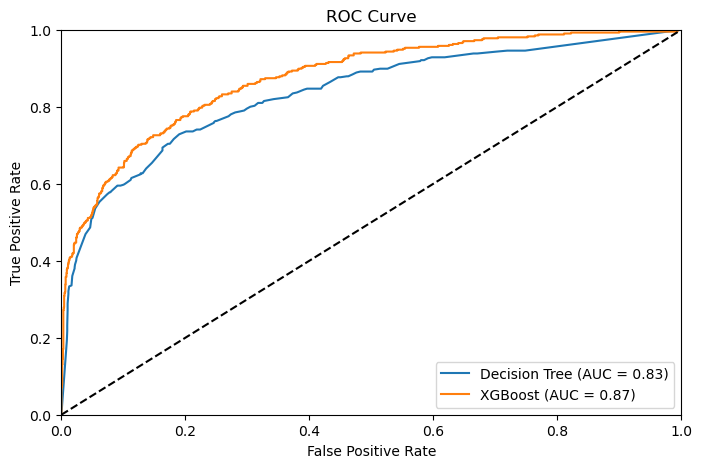

In [37]:
plt.figure(figsize=(8, 5))
plt.plot(dtc_fpr, dtc_tpr, label=f'Decision Tree (AUC = {dtc_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In our churn prediction study, we evaluated two different models. Among these two models, XGBoost demonstrated the best predictive performance. These results indicate that XGBoost is effective choices for estimating the likelihood of customer churn. Utilizing this model for managing customer loyalty and reducing churn rates could be a significant step towards enhancing the company's success.